## Final Project Submission

Please fill out:
* Student name: firdosa Mohamed Adan
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Maryann mwikali
* Blog post URL:N/A


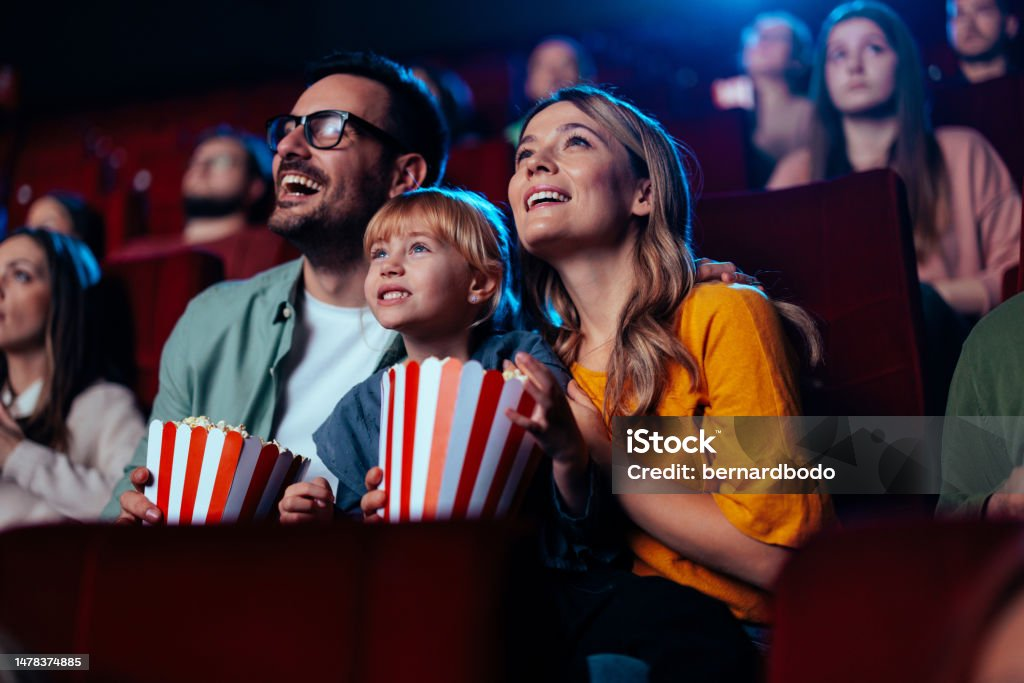

## OVERVIEW

Find out what kinds of movies are doing well at the box office right now by doing in-depth research on current trends and performance.Analyze crowd demographics and box office statistics.Analyze popular movies according to their genre.Examine the tastes and actions of the audience to find out what draws them to the theater, paying particular attention to elements such as genre, narrative style, casting, and representation. Examine the tactics employed by prosperous film studios and production businesses to comprehend their methods for creating, promoting, and distributing films.Provide Microsoft's film studio with practical insights derived from research findings by suggesting which kinds of films to prioritize based on audience preferences, market demand, and industry trends.Create strategic proposals for the movie studio owned by Microsoft. 

## BUSINESS UNDERSTANDING

Microsoft sees an opportunity to grow its presence in the entertainment business by launching its own movie studio. However, due to its lack of experience in film production, Microsoft confronts the issue of selecting the best viable path for its venture. To solve this, extensive market research and analysis are required to determine the types of films that are currently resonating with audiences and performing well at the box office. By learning about current trends, audience preferences, and the competitive landscape, Microsoft can make informed decisions about which films to produce. This insight will allow the head of Microsoft's new movie studio to strategize effectively, capitalizing on identified opportunities while reducing risks, so positioning the studio for success in a highly competitive and dynamic sector.

## loading libraries for analysis and visualization

In [567]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

## DATA UNDERSTANDING

# 1.bommovie

In [568]:
# reads the  CSV file named "bom.movie_gross.csv.gz"
bom_movie_df = pd.read_csv("C:\\Users\\Adan\\Documents\\GitHub\\dsc-phase-1-project--film-industry-analysis\\zippedData\\bom.movie_gross.csv.gz")
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [569]:
#obtaing information on the dataframe structure number of entries (rows) in the DataFrame ;
#column names and their respective data types.non-null values in each column.

bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [570]:
#dentifying duplicated rows in the DataFrame
bom_movie_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

In [571]:
#identifying missing values
bom_movie_df.isna()

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [572]:
#removing  non-alphanumeric characters from the values in the 'foreign_gross' column
bom_movie_df['foreign_gross'].replace('\W', '', regex=True, inplace= True)

In [573]:
#converting the values in the 'foreign_gross' column to floats
bom_movie_df .foreign_gross = bom_movie_df.foreign_gross.astype(float) 

In [574]:
#summing null values in each column
bom_movie_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [575]:
# adding a new column totalgross which is the sum of foreign and domestic gross
bom_movie_df['totalgross'] = bom_movie_df['foreign_gross'] + bom_movie_df['domestic_gross']
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year,totalgross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,NaN
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
3384,El Pacto,Sony,2500.0,NaN,2018,NaN
3385,The Swan,Synergetic,2400.0,NaN,2018,NaN


In [576]:
#return sum of counts
bom_movie_df.studio.value_counts()

IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
HC              1
WOW             1
PalT            1
E1              1
Grindstone      1
Name: studio, Length: 257, dtype: int64

In [577]:
## filtering the dataset to only the domestic gross above $100000000
bom_movie_df = bom_movie_df[bom_movie_df['totalgross'] > 1000000000] 
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year,totalgross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
329,Transformers: Dark of the Moon,P/DW,352400000.0,771400000.0,2011,1.123800e+09
330,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011,1.045700e+09
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
728,Skyfall,Sony,304400000.0,804200000.0,2012,1.108600e+09
729,The Dark Knight Rises,WB,448100000.0,636800000.0,2012,1.084900e+09
730,The Hobbit: An Unexpected Journey,WB (NL),303000000.0,718100000.0,2012,1.021100e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09


# 2. tn_movies_budget

In [578]:
#read the tn.movies_budget_csv
tn_movies_budget_df =pd.read_csv ("C:\\Users\\Adan\\Documents\\GitHub\\dsc-phase-1-project--film-industry-analysis\\zippedData\\tn.movie_budgets.csv.gz")
tn_movies_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [579]:


#change to float
tn_movies_budget_df['production_budget'] = tn_movies_budget_df['production_budget'].replace('[^.0-9]', '', regex=True).astype('float32')
tn_movies_budget_df['domestic_gross'] = tn_movies_budget_df['domestic_gross'].replace('[^.0-9]', '', regex=True).astype('float32')
tn_movies_budget_df['worldwide_gross'] = tn_movies_budget_df['worldwide_gross'].replace('[^.0-9]', '',regex = True).astype('float64')


In [580]:
#viewing the first 5 rows
tn_movies_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09


In [581]:
#descriptive summary of the dataframe
tn_movies_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float32
 4   domestic_gross     5782 non-null   float32
 5   worldwide_gross    5782 non-null   float64
dtypes: float32(2), float64(1), int64(1), object(2)
memory usage: 226.0+ KB


In [582]:
#calculating  the sum of missing values in each column
tn_movies_budget_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [583]:
#creates a new column called "year" based on the year information extracted from the release dates.
tn_movies_budget_df['release_date'] = pd.to_datetime(tn_movies_budget_df['release_date'], errors='coerce')
tn_movies_budget_df['year'] = tn_movies_budget_df['release_date'].dt.strftime('%Y')
tn_movies_budget_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,2018
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08,2007
8,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,2017
9,10,2015-11-06,Spectre,300000000.0,200074176.0,8.796209e+08,2015


In [584]:
#sorts the DataFrame  based on the values in the "worldwide_gross" column in ascending order
tn_movies_budget_df.sort_values('worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
5037,38,2019-04-23,Living Dark: The Story of Ted the Caver,1750000.0,0.0,0.000000e+00,2019
3975,76,2015-05-15,Pound of Flesh,7500000.0,0.0,0.000000e+00,2015
4627,28,2011-06-28,2:13,3500000.0,0.0,0.000000e+00,2011
4628,29,2013-01-29,"Batman: The Dark Knight Returns, Part 2",3500000.0,0.0,0.000000e+00,2013
3947,48,2019-06-21,Burn Your Maps,8000000.0,0.0,0.000000e+00,2019
...,...,...,...,...,...,...,...
33,34,2015-06-12,Jurassic World,215000000.0,652270656.0,1.648855e+09,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,2018
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,2015
42,43,1997-12-19,Titanic,200000000.0,659363968.0,2.208208e+09,1997


In [585]:
#drop all all rows without the values in domestic gross and worlwide gross columns
tn_movies_budget_drop= tn_movies_budget_df[(tn_movies_budget_df['domestic_gross'] == 0) & (tn_movies_budget_df['worldwide_gross'] == 0)]

In [586]:
#rows identified by the index values in tn_movies_budget_drop will be removed and the dataframe updated
tn_movies_budget_df.drop(tn_movies_budget_drop.index, axis=0, inplace=True)
tn_movies_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,2017


In [587]:
#convert year values to string
tn_movies_budget_df['year'] = tn_movies_budget_df['year'].astype(int)

In [588]:
#drop rows which are not between the years 2015 and 2022
tn_movies_budget_df.drop(tn_movies_budget_df[tn_movies_budget_df['year'] <= 2014].index, inplace=True)

tn_movies_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 2 to 5748
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 797 non-null    int64         
 1   release_date       797 non-null    datetime64[ns]
 2   movie              797 non-null    object        
 3   production_budget  797 non-null    float32       
 4   domestic_gross     797 non-null    float32       
 5   worldwide_gross    797 non-null    float64       
 6   year               797 non-null    int32         
dtypes: datetime64[ns](1), float32(2), float64(1), int32(1), int64(1), object(1)
memory usage: 40.5+ KB


In [589]:
#totalcounts in the column year in the dataframe
tn_movies_budget_df['year'].value_counts()

2015    242
2016    204
2017    162
2018    140
2019     49
Name: year, dtype: int64

In [590]:
#obtain the descriptive statistics
tn_movies_budget_df.describe()

,id,production_budget,domestic_gross,worldwide_gross,year
count,797.000000,797.0,797.0,7.970000e+02,797.000000
mean,50.634881,44454288.0,57354036.0,1.477667e+08,2016.435383
std,29.339221,57002492.0,98196584.0,2.607258e+08,1.255101
min,1.000000,25000.0,0.0,2.600000e+01,2015.000000
25%,25.000000,8000000.0,3000342.0,8.200000e+06,2015.000000
50%,50.000000,22000000.0,24431472.0,4.517374e+07,2016.000000
75%,78.000000,55000000.0,63859436.0,1.594876e+08,2017.000000
max,100.000000,350000000.0,936662208.0,2.053311e+09,2019.000000


In [591]:
#creating a new column that shows gains or losses after a movie production
tn_movies_budget_df['returns'] = (tn_movies_budget_df['worldwide_gross'] - tn_movies_budget_df['production_budget'])
tn_movies_budget_df['returns'] = tn_movies_budget_df['returns'].astype(int) 

In [592]:
#first five rows
tn_movies_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,returns
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,2019,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,2015,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,2017,999721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,2015,1747311220
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,2018,1748134200


# 3 movie_info data

reading data in the rt.movie_info.tsv

In [593]:
movie_info_df = pd.read_csv("C:\\Users\\Adan\\Documents\\GitHub\\dsc-phase-1-project--film-industry-analysis\zippedData\\rt.movie_info.tsv.gz", delimiter ='\t', encoding='unicode_escape' )
movie_info_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [594]:
#descriptive summary of the dataframe
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [595]:
#sum of the missing value in each column
movie_info_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [596]:
#dropping missing value
movie_info_df.dropna(inplace = True)

In [597]:
#confirming the missing values are removed
movie_info_df.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [598]:
movie_info_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,"72,700,000",126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,"1,320,005",123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment


In [599]:
#checking for unique values in the box office column
print(movie_info_df['box_office'].unique())

['600,000' '41,032,915' '224,114' '1,039,869' '20,518,224' '1,971,135'
 '201,010' '54,100,000' '35,565,975' '4,806,750' '5,051,927' '1,000,000'
 '42,929,971' '13,248,477' '64,001,297' '2,974,308' '37,431,431'
 '67,771,442' '73,023,275' '4,007,792' '1,626,289' '3,998,889' '2,839,256'
 '128,579,698' '21,318,194' '84,293' '8,518,148' '12,583,510' '35,000,629'
 '37,331,031' '145,778' '63,400,000' '80,574,010' '47,781,388' '5,600,000'
 '200,000' '134,455,175' '25,957,696' '3,200,000' '308,164' '32,741,596'
 '15,986,272' '13,710,572' '4,756,532' '42,194,060' '347,321' '7,366,736'
 '8,134,217' '419,361' '1,341,151' '121,500,000' '154,485,963'
 '54,132,596' '46,982,632' '55,400,000' '2,536,460' '39,697,363'
 '21,379,315' '480,926' '82,468,131' '44,478,018' '1,300,000' '2,209,479'
 '6,426,953' '10,500,000' '32,000,000' '35,764,982' '14,037,964'
 '26,800,000' '598,103' '67,631,157' '88,800,000' '22,099' '12,610,731'
 '529,426' '241,250,669' '107,506,776' '10,572,742' '52,277,485'
 '1,800,000' '3

In [600]:
movie_info_df['box_office'] = [int(value.replace(',', '')) for value in movie_info_df['box_office'] ]


## DATA ANALYSIS and DATA VISUALIZATION

## Which studio made huge profits

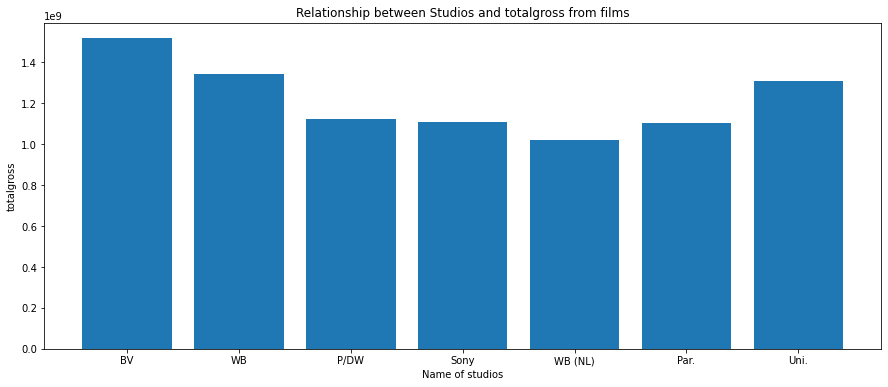

In [601]:
#Bar plot
fig, ax = plt.subplots(figsize=(15,6))
plt.bar( x= bom_movie_df.studio, height= bom_movie_df.totalgross)
plt.xlabel('Name of studios')
plt.ylabel('totalgross')
plt.title('Relationship between Studios and totalgross from films')
plt.show()

from the above plot we can conclude that BV, Uni and WB were leading in totalgross from film production,hence would advice microsoft to analyse their marketing , the genres they produce and and what they are doing differently from other studios 

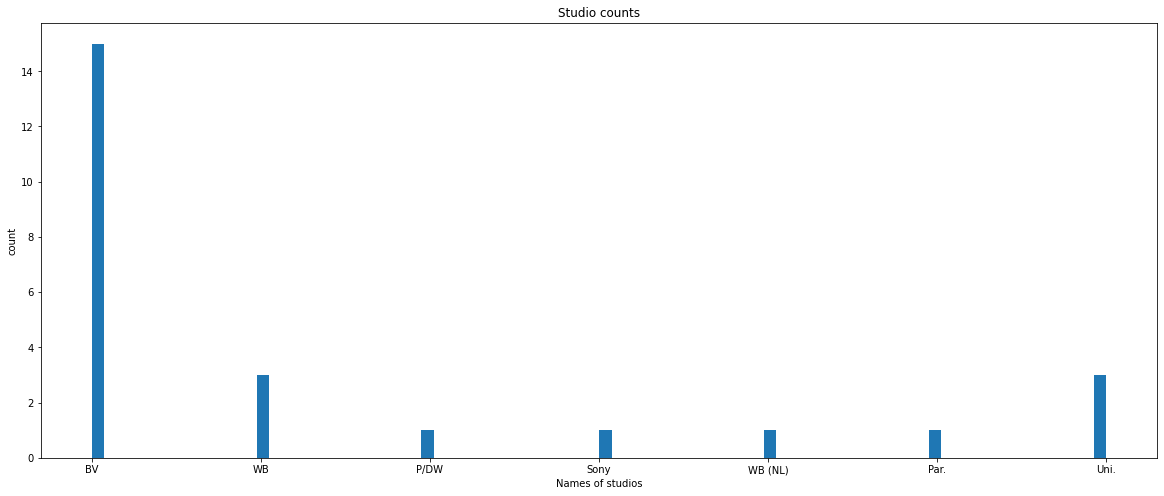

In [602]:
fig, ax = plt.subplots(figsize = (20,8))
ax.hist(bom_movie_df.studio, bins = 80)
ax.set_xlabel('Names of studios')
ax.set_ylabel('count')
ax.set_title('Studio counts');

# findings:
from the above plot we draw the information that the top three studios are ; BV, Uni and WB


## Whats correlation between production bugdet and returns?

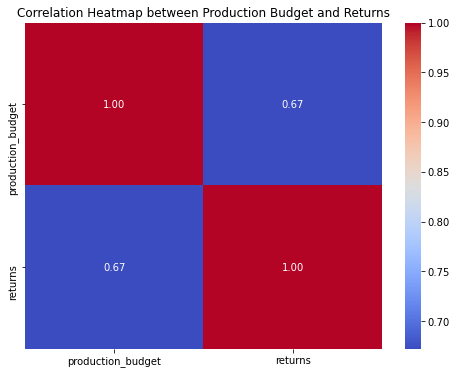

In [603]:
# Calculate the correlation matrix
correlation_matrix = tn_movies_budget_df[['production_budget', 'returns']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Production Budget and Returns')
plt.show()

A strong positive linear relationship between the two  means that as production budget increases, returns also tends to increase in a consistent manner.
This is something for microsoft to consider to generate great returns.

## Investigating relationship between runtime and boxoffice

In [604]:
#droppring missing values and sorting  box_office column in descending order
movie_info_df.dropna(axis = 0, inplace=True)
movie_info_df.sort_values(by='box_office', ascending= False)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
827,1071,This depiction of the last 12 hours in the lif...,R,Drama,Mel Gibson,Mel Gibson|Benedict Fitzgerald,"Feb 25, 2004","Aug 31, 2004",$,368000000,127 minutes,Newmarket Film Group
877,1136,The Hobbit: An Unexpected Journey follows titl...,PG-13,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,"Dec 14, 2012","Mar 19, 2013",$,303001229,170 minutes,Warner Bros.
1188,1525,"In Skyfall, Bond's loyalty to M is tested as h...",PG-13,Action and Adventure|Mystery and Suspense,Sam Mendes,John Logan|Robert Wade|Neal Purvis,"Nov 9, 2012","Mar 11, 2013",$,299300000,145 minutes,MGM
690,883,"Now that Greg Focker is ""in"" with his soon-to-...",PG-13,Comedy,Jay Roach,Jim Herzfeld|John Hamburg,"Dec 22, 2004","Apr 26, 2005",$,279167575,118 minutes,Universal Pictures
1117,1442,Youthful wizard Harry Potter returns to the sc...,PG,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,"Nov 15, 2002","Apr 11, 2003",$,261835892,161 minutes,Warner Bros. Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1353,1747,College freshman Adam Buckley sits blindfolded...,R,Drama|Mystery and Suspense,Will Canon,Will Canon|Douglas Simon,"Feb 18, 2011","May 17, 2011",$,16632,81 minutes,Phase 4 Films
1269,1639,In this darkly erotic drama from cult filmmake...,NR,Art House and International|Drama,Jeanne Labrune,Jeanne Labrune|Richard Debuisne,"Aug 26, 2011","Jan 17, 2012",$,8856,95 minutes,First Run Features
691,884,Freebie (James Caan) and the Bean (Alan Arkin)...,R,Action and Adventure|Comedy|Drama,Richard Rush,Robert Kaufman,"Dec 25, 1974","Jan 11, 2011",$,8300,114 minutes,Warner Bros. Pictures
697,895,"After a sexual assault by a random stranger, S...",NR,Drama|Horror|Mystery and Suspense,Eric England,Eric England,"Nov 22, 2013","Mar 18, 2014",$,3328,84 minutes,IFC Films


In [605]:
#converting runtime column to a float
movie_info_df['runtime'] = movie_info_df['runtime'].replace('[^.0-9]', '', regex=True).astype('float')

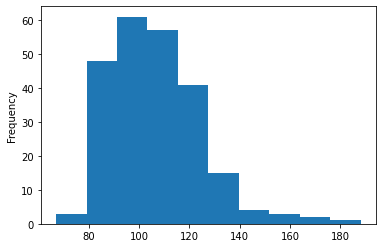

In [606]:
#frequency of runtime column
movie_info_df['runtime'].plot(kind='hist');

most have a runtime between 80 - 140 minutes

In [607]:
# Arrange the rows in a descending order for easy extraction of top performing films.
movie_info_df.sort_values(by='box_office', ascending= False)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
827,1071,This depiction of the last 12 hours in the lif...,R,Drama,Mel Gibson,Mel Gibson|Benedict Fitzgerald,"Feb 25, 2004","Aug 31, 2004",$,368000000,127.0,Newmarket Film Group
877,1136,The Hobbit: An Unexpected Journey follows titl...,PG-13,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,"Dec 14, 2012","Mar 19, 2013",$,303001229,170.0,Warner Bros.
1188,1525,"In Skyfall, Bond's loyalty to M is tested as h...",PG-13,Action and Adventure|Mystery and Suspense,Sam Mendes,John Logan|Robert Wade|Neal Purvis,"Nov 9, 2012","Mar 11, 2013",$,299300000,145.0,MGM
690,883,"Now that Greg Focker is ""in"" with his soon-to-...",PG-13,Comedy,Jay Roach,Jim Herzfeld|John Hamburg,"Dec 22, 2004","Apr 26, 2005",$,279167575,118.0,Universal Pictures
1117,1442,Youthful wizard Harry Potter returns to the sc...,PG,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,"Nov 15, 2002","Apr 11, 2003",$,261835892,161.0,Warner Bros. Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1353,1747,College freshman Adam Buckley sits blindfolded...,R,Drama|Mystery and Suspense,Will Canon,Will Canon|Douglas Simon,"Feb 18, 2011","May 17, 2011",$,16632,81.0,Phase 4 Films
1269,1639,In this darkly erotic drama from cult filmmake...,NR,Art House and International|Drama,Jeanne Labrune,Jeanne Labrune|Richard Debuisne,"Aug 26, 2011","Jan 17, 2012",$,8856,95.0,First Run Features
691,884,Freebie (James Caan) and the Bean (Alan Arkin)...,R,Action and Adventure|Comedy|Drama,Richard Rush,Robert Kaufman,"Dec 25, 1974","Jan 11, 2011",$,8300,114.0,Warner Bros. Pictures
697,895,"After a sexual assault by a random stranger, S...",NR,Drama|Horror|Mystery and Suspense,Eric England,Eric England,"Nov 22, 2013","Mar 18, 2014",$,3328,84.0,IFC Films


In [608]:
#checking datatype
type(movie_info_df['box_office'])

pandas.core.series.Series

In [610]:
#checking data type 
type(movie_info_df['runtime'])

pandas.core.series.Series

In [611]:
#checking datatype
movie_info_df['runtime'] = movie_info_df['runtime'].astype(float)

In [612]:
#viewing the data frame
movie_info_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108.0,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82.0,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123.0,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869,108.0,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224,127.0,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,72700000,126.0,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,1320005,123.0,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,25335935,119.0,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,1416189,129.0,Eros Entertainment


In [613]:
#converting to float
movie_info_df['box_office'] = movie_info_df['box_office'].astype(float)

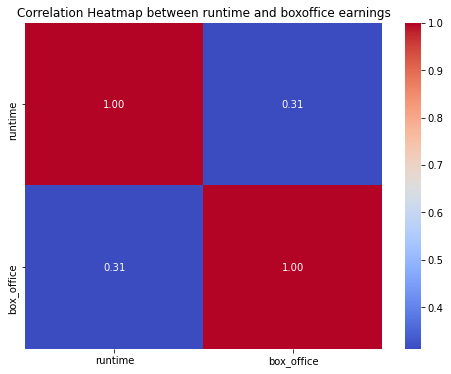

In [614]:
# Calculating  the correlation matrix
correlation_matrix = movie_info_df[['runtime', 'box_office']].corr()

# Ploting  the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between runtime and boxoffice earnings')
plt.show()

# findings:
positive linear relationship between runtime  and box office earnings.Though a weak relationship this translates that an increase in runtime leads to an increase in boxoffice earnings

# RECOMENDATIONS

Using insights from the bom_movie data we would advice Microsoft in case of any future partnership plans or wanting to go into the industry alone they can benchmark on do a market analysiss on the the following studios; BV, Uni, WB they were popular among people and have high gross incomes 

from the tn.movies_budget data we can conclude that there's a strong linear relationship between production_budget and returns where returns is simply the profit made hence if Microsoft were to consider highly investing in production it would mean high gains

when analysis the relationship between run time and box office earnings in the movie_info data we found out that there is a weak linear relationship between run time and box office earnings though a weak relationship stil translates to when the runtime is increased the box office earnings also increase,hence Microsoft producing films with  high runtime will translate to also high boxoffice earnings